# CB:SyR es grande, y cada vez más

Este notebook descarga el último feed del podcast *Coffee Break: Señal y Ruido* desde IVoox y calcula algunas estadísticas interesantes.
    

In [8]:
from coffeebreak import guests
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [9]:
# Enable the wants_guest_columns=True to get a numeric column for each guest
eps = guests.to_df(guests.load_episodes(), wants_guest_columns=True)
#eps = guests.to_df(guests.load_episodes())
eps = eps[(eps['number'] != -1)]
eps = eps[(eps['guests_count'] != 0)]
eps = eps.iloc[::-1].reset_index(drop=True)
eps


,id,title,number,duration,length,guests,summary,guests_count,Eva,Beatriz Villarroel,...,Joaquim Matías,Angel López Sánchez,Cristina Ramos,Jorge Pla-García,Marcos Pellejero,Javier Peláez,Noemí Pinilla,Juanjo Martín,Nayra Rodríguez,Laura
0,EP01,Coffee Break Podcast Ep01,1,2498,19985180,"[Héctor Socas, Juanjo Martín, Alfred Rosenberg...",(Por un problema técnico no se escucha bien la...,5,0,0,...,0,0,0,0,0,0,0,1,0,0
1,EP02,Coffee Break Podcast Ep02,2,3141,25130477,"[Jose Ramón Arévalo, Alfred Rosenberg, Nayra R...",La tertulia semanal en la que nos echamos unas...,5,0,0,...,0,0,0,0,0,0,0,0,1,0
2,EP03,Coffee Break Podcast Ep03,3,3198,25589347,"[Héctor Socas, Jose Ramón Arévalo, Manolo Vázq...",La tertulia semanal sobre la actualidad cientí...,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,EP04,Coffee Break Podcast Ep04,4,2923,23390084,"[Manolo Vázquez, Alfred Rosenberg, Nayra Rodrí...",La tertulia semanal sobre la actualidad cientí...,4,0,0,...,0,0,0,0,0,0,0,0,1,0
4,EP05,Coffee Break Podcast Ep05,5,5999,48007315,"[Manolo Vázquez, Héctor Socas]",La tertulia semanal sobre la actualidad cientí...,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,EP257,Ep257: Marte; Freeman Dyson; Dark Energy Surve...,257,11558,92469124,"[Héctor Vives, Sara Robisco, Francis Villatoro...",La tertulia semanal en la que repasamos las úl...,5,0,0,...,0,0,0,0,0,0,0,0,0,0
247,EP258,Ep258: Cosmología; Física de Partículas; Dryas...,258,7516,60135802,"[Alberto Aparici, Francis Villatoro, Carlos We...",La tertulia semanal en la que repasamos las úl...,4,0,0,...,0,0,0,0,0,0,0,0,0,0
248,EP259,Ep259: Exomars 2022; Dinosaurios; Coronavirus,259,14580,116642839,"[Sara Robisco, Héctor Socas, Francis Villatoro...",La tertulia semanal en la que repasamos las úl...,6,0,0,...,0,0,0,0,0,0,0,0,0,0
249,EP260,Ep260: Premios Abel; Superfulguraciones; Emoci...,260,13501,108014071,"[Alberto Aparici, Francis Villatoro, María Rib...",La tertulia semanal en la que repasamos las úl...,6,0,0,...,0,0,0,0,0,0,0,0,0,0


## Duración de los episodios en el tiempo

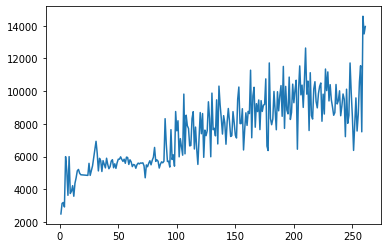

In [10]:
fig = plt.figure()
ax = plt.axes()

ax.plot(eps['number'], eps["duration"]);



## Histograma de las duraciones de cada episodio.

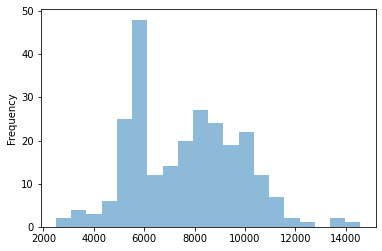

In [11]:
ax = eps['duration'].plot.hist(bins=20, alpha=0.5)

## Histograma del número de contertulios participando en cada programa

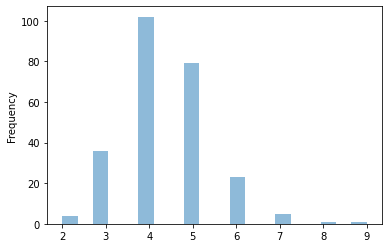

In [12]:
ax = eps['guests_count'].plot.hist(bins=20, alpha=0.5)

## Relación entre el número de contertulios y la duración de los programas

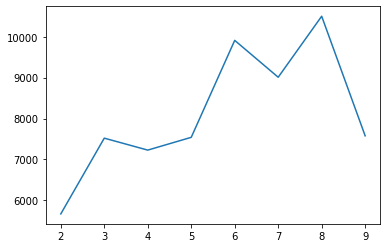

In [13]:
crowdedness = eps.groupby('guests_count').mean()
fig = plt.figure()
ax = plt.axes()

ax.plot(crowdedness.index, crowdedness['duration']);

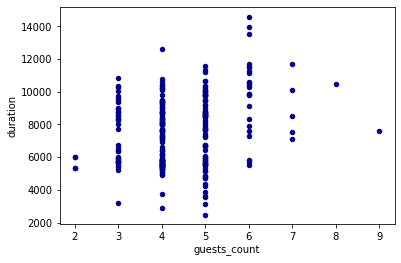

In [14]:
ax1 = eps.plot.scatter(x='guests_count',
                       y='duration',
                       c='DarkBlue')